# Session 3 — Sentence-Level Analysis
## Measure 1: Sentence Length & Distribution
This notebook helps you split your text into sentences and compute:
- number of sentences
- average sentence length (in tokens and in characters)
- distribution / histogram of sentence lengths
- comparison across two texts/authors

Like before, we'll analyze Stephen King books as our example texts:
-  Pet Semetary
- The Shining

In [4]:
import re
from collections import Counter
import matplotlib.pyplot as plt

# Load the Alice books from Project Gutenberg
def load_book(filepath):
    """Load and clean book text from Archeiv"""
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()
    
    # Remove Project Gutenberg headers/footers
    # Find start of actual content
    if 'CHAPTER I' in text:
        start = text.find('CHAPTER I')
        text = text[start:]
    elif '*** START OF' in text:
        start = text.find('*** START OF')
        text = text[start + 100:]  # Skip the marker line
    
    # Remove end markers
    if '*** END OF' in text:
        end = text.find('*** END OF')
        text = text[:end]
    elif 'End of Project Gutenberg' in text:
        end = text.find('End of Project Gutenberg')
        text = text[:end]
    
    return text.strip()

# Load both Alice books
PetSemetary_text = load_book('../data/PetSemetary.txt')
TheShining_text = load_book('../data/TheShining.txt')

print(f"Pet Semetary: {len(PetSemetary_text):,} characters")
print(f"The Shining: {len(TheShining_text):,} characters")

Pet Semetary: 812,501 characters
The Shining: 906,142 characters


In [5]:
# Analyze sentence length for both books
def analyze_sentences(text, book_name):
    """Split text into sentences and analyze lengths"""
    # Split on sentence boundaries
    sentences = re.split(r'[.!?]+\s+', text.strip())
    sentences = [s.strip() for s in sentences if s.strip() and len(s.split()) > 2]
    
    lengths_tokens = [len(s.split()) for s in sentences]
    lengths_chars = [len(s) for s in sentences]
    
    print(f"\n{'='*70}")
    print(f"{book_name}")
    print(f"{'='*70}")
    print(f"Number of sentences: {len(sentences):,}")
    print(f"Avg sentence length (tokens): {sum(lengths_tokens)/len(lengths_tokens):.2f}")
    print(f"Avg sentence length (chars): {sum(lengths_chars)/len(lengths_chars):.2f}")
    print(f"Min sentence length (tokens): {min(lengths_tokens)}")
    print(f"Max sentence length (tokens): {max(lengths_tokens)}")
    
    return sentences, lengths_tokens, lengths_chars

# Analyze both books
PetSemetary_sents, PetSemetary_tokens, PetSemetary_chars = analyze_sentences(PetSemetary_text, " Pet Semetary")
TheShining_sents, TheShining_tokens, TheShining_chars = analyze_sentences(TheShining_text, "The Shining")


 Pet Semetary
Number of sentences: 8,907
Avg sentence length (tokens): 16.29
Avg sentence length (chars): 87.67
Min sentence length (tokens): 3
Max sentence length (tokens): 172

The Shining
Number of sentences: 11,058
Avg sentence length (tokens): 14.48
Avg sentence length (chars): 78.26
Min sentence length (tokens): 3
Max sentence length (tokens): 142


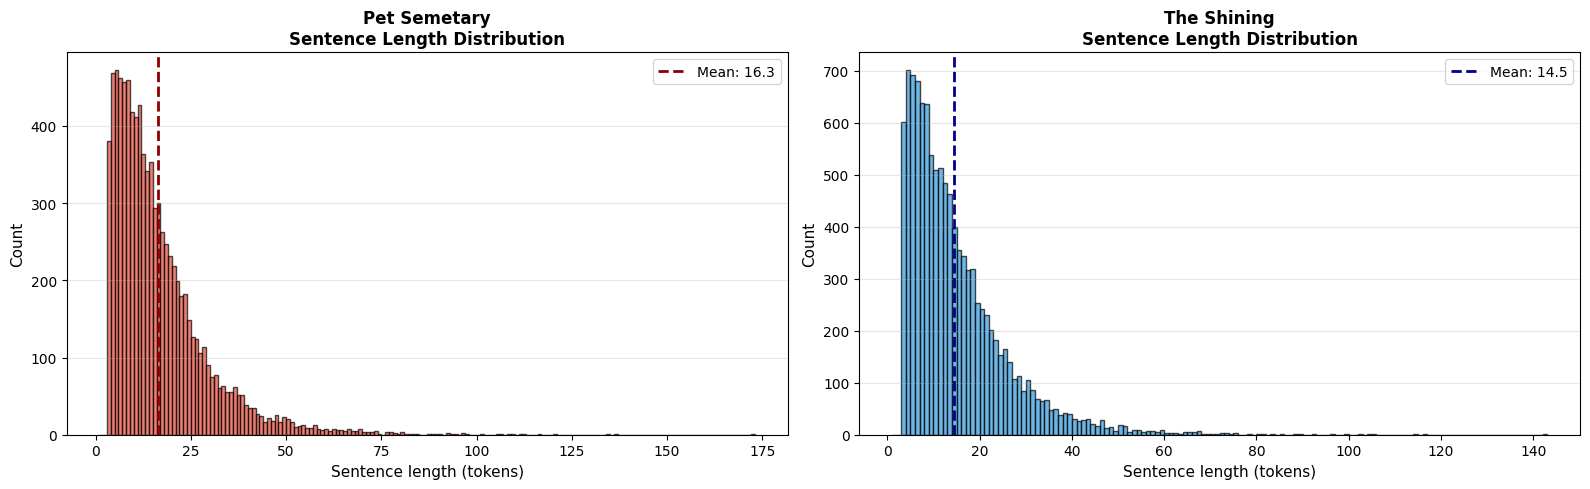

In [6]:
# Visualize sentence length distributions for both books
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# PetSemetary
ax1 = axes[0]
ax1.hist(PetSemetary_tokens, bins=range(1, max(PetSemetary_tokens)+2), alpha=0.7, color='#e74c3c', edgecolor='black')
ax1.set_xlabel('Sentence length (tokens)', fontsize=11)
ax1.set_ylabel('Count', fontsize=11)
ax1.set_title("Pet Semetary\nSentence Length Distribution", fontsize=12, fontweight='bold')
ax1.axvline(sum(PetSemetary_tokens)/len(PetSemetary_tokens), color='darkred', linestyle='--', linewidth=2, label=f'Mean: {sum(PetSemetary_tokens)/len(PetSemetary_tokens):.1f}')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Looking-Glass
ax2 = axes[1]
ax2.hist(TheShining_tokens, bins=range(1, max(TheShining_tokens)+2), alpha=0.7, color='#3498db', edgecolor='black')
ax2.set_xlabel('Sentence length (tokens)', fontsize=11)
ax2.set_ylabel('Count', fontsize=11)
ax2.set_title('The Shining\nSentence Length Distribution', fontsize=12, fontweight='bold')
ax2.axvline(sum(TheShining_tokens)/len(TheShining_tokens), color='darkblue', linestyle='--', linewidth=2, label=f'Mean: {sum(TheShining_tokens)/len(TheShining_tokens):.1f}')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

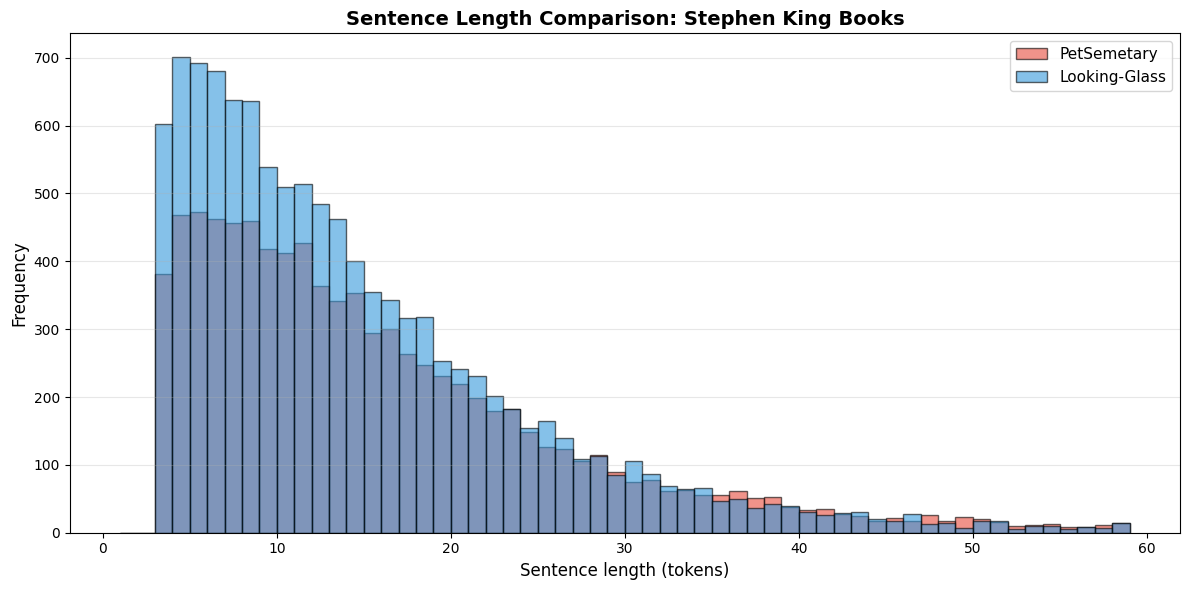


COMPARATIVE STATISTICS
Metric                            Pet Semetary     The Shining
----------------------------------------------------------------------
Mean sentence length                     16.29           14.48
Median sentence length                      13              12
Shortest sentence                            3               3
Longest sentence                           172             142


In [7]:
# Compare both books side by side
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(PetSemetary_tokens, bins=range(1, 60), alpha=0.6, color='#e74c3c', label='PetSemetary', edgecolor='black')
ax.hist(TheShining_tokens, bins=range(1, 60), alpha=0.6, color='#3498db', label='Looking-Glass', edgecolor='black')
ax.set_xlabel('Sentence length (tokens)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Sentence Length Comparison: Stephen King Books', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n" + "="*70)
print("COMPARATIVE STATISTICS")
print("="*70)
print(f"{'Metric':<30} {'Pet Semetary':>15} {'The Shining':>15}")
print("-"*70)
print(f"{'Mean sentence length':<30} {sum(PetSemetary_tokens)/len(PetSemetary_tokens):>15.2f} {sum(TheShining_tokens)/len(TheShining_tokens):>15.2f}")
print(f"{'Median sentence length':<30} {sorted(PetSemetary_tokens)[len(PetSemetary_tokens)//2]:>15} {sorted(TheShining_tokens)[len(TheShining_tokens)//2]:>15}")
print(f"{'Shortest sentence':<30} {min(PetSemetary_tokens):>15} {min(TheShining_tokens):>15}")
print(f"{'Longest sentence':<30} {max(PetSemetary_tokens):>15} {max(TheShining_tokens):>15}")